In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [18]:
from tensorflow.keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [19]:
type(train_images)

numpy.ndarray

In [4]:
print(len(train_images))

60000


In [5]:
print(train_images[0].shape)

(28, 28)


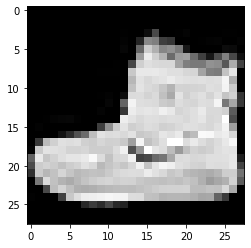

In [6]:
# display an image from the dataset
plt.imshow(train_images[0],cmap='gray')
plt.show()

In [7]:
print(train_labels[0])

9


In [8]:
# Normalizing the values between 0 and 1

train_images,train_labels=train_images/255.0,test_images/255.0

In [9]:
# Reshape images to specify that it is a single channel

train_images=train_images.reshape([train_images.shape[0],28,28,1])
test_images=test_images.reshape([test_images.shape[0],28,28,1])

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [14]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
# Build the convolution network

model=model.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu')        
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
          
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu')
          
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64),activation='relu')
model.add(keras.layers.Dense(10))          



In [13]:
print("Train images shape:", train_images.shape)
print("Length of train labels:", len(train_labels))

Train images shape: (60000, 28, 28, 1)
Length of train labels: 10000


In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
# compiling the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [24]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5


1875/1875 [==============================] - 22s 9ms/step - loss: 0.5787 - acc: 0.8178 - val_loss: 0.4022 - val_acc: 0.8532
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3514 - acc: 0.8738 - val_loss: 0.3700 - val_acc: 0.8674
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3126 - acc: 0.8861 - val_loss: 0.3744 - val_acc: 0.8585
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2901 - acc: 0.8938 - val_loss: 0.3286 - val_acc: 0.8832
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2668 - acc: 0.9013 - val_loss: 0.3148 - val_acc: 0.8890


In [25]:
# Evaluate the model
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('test accuracy:',test_acc)

313/313 - 1s - loss: 0.3148 - acc: 0.8890 - 1s/epoch - 3ms/step
test accuracy: 0.8889999985694885


C:\anaconda\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
